In [7]:
import numpy as np
import scipy.linalg as spl
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Résolution du problème 1D, avec conditions de Dirichlet homogènes

In [30]:
graphcolor = "blue"
xm = 0
xM = 1
x0 = 1/3


Nm = 30   #Nb de points de maillages intérieurs sur [0,x0]
NM = 60   #Nb de points de maillages intérieurs sur [x0,1]
Im = np.linspace(0,x0,Nm+2)
IM = np.linspace(x0,1,NM+2)

def a(x):
    return 1

def f(x):
    return np.exp(-(x-1/2)**2)

Beta = 1    

U = np.zeros(Nm+NM+4)

In [31]:
def quadrature(f, a, b): 
    
    mid = (a+b)/2
    size = b-a
    ecart = np.sqrt(3/20) * size  #A calculer une fois comme variable global si 
    
    p1 = f(mid - ecart)
    p2 = f(mid)
    p3 = f(mid + ecart)
    
    
    intval = (5*p1 + 8*p2 + 5*p3)*size/18
    
    return intval


In [32]:
def Mat_Sys(Nm,NM):
    hm = (x0-xm)/(Nm+1)
    hM = (xM-x0)/(NM+1)

    wm = np.zeros(Nm+1)
    wM = np.zeros(NM+1)
    #wm[:] = (1/hm**2)*quadrature(lambda x :a(x),Im[:-1],Im[1:])[0]   -> La notation [:] ne marche pas dans la fct quad visiblement
    #wM[:] = (1/hM**2)*quadrature(lambda x :a(x),IM[:-1],IM[1:])[0]
    for i in range(Nm+1):
        wm[i] = (1/hm**2)*quadrature(lambda x :a(x),Im[i],Im[i+1])
    for i in range(NM+1):
        wM[i] = (1/hM**2)*quadrature(lambda x :a(x),IM[i],IM[i+1])
    v1 = np.concatenate((wm[1:],[Beta],wM[:-1]))
    v0 = np.concatenate((wm[:-1]+wm[1:],[wm[-1]+Beta],[wM[0]+Beta],wM[:-1]+wM[1:]))

    A = np.diag(-1*v1,1) + np.diag(-1*v1,-1)
    np.fill_diagonal(A, v0)

    return A

In [33]:
def phi(n,x):
    if x<x0:
        return (x > Im[n-1])*(x < Im[n])*(x-Im[n-1])/(Im[n]-Im[n-1]) + (x > Im[n])*(x < Im[n+1])*(Im[n+1]-x)/(Im[n+1]-Im[n])
    else:
        return (x > IM[n-1])*(x < IM[n])*(x-IM[n-1])/(IM[n]-IM[n-1]) + (x > IM[n])*(x < IM[n+1])*(IM[n+1]-x)/(IM[n+1]-IM[n])



def Sec_Mem(Nm,NM):
    fm = np.zeros(Nm+1)
    fM = np.zeros(NM+1)
    
    #i = np.linspace(1,Nm+1,Nm+1)
    #fm[:] = quadrature(lambda x :f(x)*phi(i[:],x),0,1)[0]    -> même pb que plus haut
    #fM[:] = quadrature(lambda x :f(x)*phi(i[:],x),0,1)[0]
    for i in range(Nm+1):
        fm[i] = quadrature(lambda x :f(x)*phi(i,x),Im[i],Im[i+1])
    for i in range(NM+1):
        fM[i] = quadrature(lambda x :f(x)*phi(i,x),IM[i],IM[i+1])
    fm[Nm] = quadrature(lambda x :f(x)*phi(Nm,x),0,x0)
    fM[0] = quadrature(lambda x :f(x)*phi(0,x),x0,1)

    return np.concatenate((fm,fM))


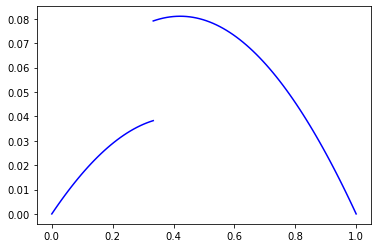

In [34]:
U[1:-1] = spl.solve(Mat_Sys(Nm,NM),Sec_Mem(Nm,NM))
plt.plot(Im,U[:Nm+2], color=graphcolor)
plt.plot(IM,U[Nm+2:], color=graphcolor)
plt.show()

### Résolution du problème 1D, avec conditions de Dirichlet non homogènes

In [13]:
xm = 0
xM = 1
x0 = 1/3

Nm = 30   #Nb de points de maillages intérieurs sur [0,x0]
NM = 60   #Nb de points de maillages intérieurs sur [x0,1]
Im = np.linspace(0,x0,Nm+2)
IM = np.linspace(x0,1,NM+2)

def a(x):
    return 2+np.sin(2*np.pi*x)

def f(x):
    return np.exp(-(x-1/2)**2)

Beta = 0.1    
U_0 = 1
U_1 = 0

def uD(x):
    return (U_1-U_0)*x + U_0

alpha1 = a(x0)*uD(x0)
alpha2 = 0
#Si a est discontinue en x0
#alpha2(epsilon):
#    return a(x0+epsilon)*uD(x0+epsilon) - a(x0-epsilon)*uD(x0-epsilon)

V = np.zeros(Nm+NM+4)

In [14]:
def Mat_Sys(Nm,NM):
    hm = (x0-xm)/(Nm+1)
    hM = (xM-x0)/(NM+1)

    wm = np.zeros(Nm+1)
    wM = np.zeros(NM+1)
    #wm[:] = (1/hm**2)*quadrature(lambda x :a(x),Im[:-1],Im[1:])[0]   -> La notation [:] ne marche pas dans la fct quad visiblement
    #wM[:] = (1/hM**2)*quadrature(lambda x :a(x),IM[:-1],IM[1:])[0]
    for i in range(Nm+1):
        wm[i] = (1/hm**2)*quadrature(lambda x :a(x),Im[i],Im[i+1])
    for i in range(NM+1):
        wM[i] = (1/hM**2)*quadrature(lambda x :a(x),IM[i],IM[i+1])
    v1 = np.concatenate((wm[1:],[Beta],wM[:-1]))
    v0 = np.concatenate((wm[:-1]+wm[1:],[wm[-1]+Beta],[wM[0]+Beta],wM[:-1]+wM[1:]))

    A = np.diag(-1*v1,1) + np.diag(-1*v1,-1)
    np.fill_diagonal(A, v0)

    return A

In [15]:
def Sec_Mem(Nm,NM):
    fm = np.zeros(Nm+1)
    fM = np.zeros(NM+1)
    
    #i = np.linspace(1,Nm+1,Nm+1)
    #fm[:] = quadrature(lambda x :f(x)*phi(i[:],x),0,1)[0]    -> même pb que plus haut
    #fM[:] = quadrature(lambda x :f(x)*phi(i[:],x),0,1)[0]
    for i in range(Nm+1):
        fm[i] = quadrature(lambda x :f(x)*phi(i,x),Im[i],Im[i+1]) #On doit pouvoir vectoriser ici
    for i in range(NM+1):
        fM[i] = quadrature(lambda x :f(x)*phi(i,x),IM[i],IM[i+1])
    fm[Nm] = quadrature(lambda x :f(x)*phi(Nm,x)-alpha1+alpha2,0,x0)
    fM[0] = quadrature(lambda x :f(x)*phi(0,x)+alpha1,x0,1)

    return np.concatenate((fm,fM))

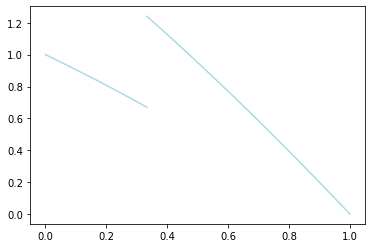

In [21]:
V[1:-1] = spl.solve(Mat_Sys(Nm,NM),Sec_Mem(Nm,NM))
U[:Nm+2] = V[:Nm+2] + uD(Im[:])
U[Nm+2:] = V[Nm+2:] + uD(IM[:])

plt.figure()
plt.plot(Im,U[:Nm+2], color=graphcolor)
plt.plot(IM,U[Nm+2:], color=graphcolor)
plt.show()